In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tqdm import tqdm
from keras.preprocessing.image import load_img

In [3]:
print(os.listdir('archive/test'))

['american_football', 'baseball', 'basketball', 'billiard_ball', 'bowling_ball', 'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 'tennis_ball', 'volleyball']


In [4]:
label_code ={'american_football':0, 'baseball':1, 'basketball':2, 'billiard_ball':3, 'bowling_ball':4, 'cricket_ball':5, 'football':6, 'golf_ball':7, 'hockey_ball':8, 'hockey_puck':9, 'rugby_ball':10, 'shuttlecock':11, 'table_tennis_ball':12, 'tennis_ball':13, 'volleyball':14}

In [5]:
label_decode =['american_football', 'baseball', 'basketball', 'billiard_ball', 'bowling_ball', 'cricket_ball', 'football', 'golf_ball', 'hockey_ball', 'hockey_puck', 'rugby_ball', 'shuttlecock', 'table_tennis_ball', 'tennis_ball', 'volleyball']

In [6]:
i = 0
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/archive/train'):
    for filename in filenames:
        i += 1
print(i)

0


In [7]:
i = 0
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/archive/test'):
    for filename in filenames:
        i += 1
print(i)

0


In [8]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
IMG_CHANNELS = 3
SAMPLES = 7328  #train
SAMPLES2 = 1841  #validation
CATEGORIES = 26 # 1 for binary classification problem

X_train = np.zeros((SAMPLES, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')
y_train = np.zeros((SAMPLES, CATEGORIES), dtype='int32')

X_val = np.zeros((SAMPLES2, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype='float32')
y_val = np.zeros((SAMPLES2, CATEGORIES), dtype='int32')

In [9]:
from keras.applications.mobilenet import preprocess_input

In [11]:
i = 0
for dirname, _, filenames in os.walk('archive/train'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_train[i,:,:,:3]  = _img
        _label = dirname.split('\\')[-1]
        _index = label_code[_label]
        y_train[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 432/432 [00:10<00:00, 40.32it/s]


In [13]:
i = 0
for dirname, _, filenames in os.walk('archive/test'):
    for filename in tqdm(filenames):
        _path = os.path.join(dirname, filename)
        _img = load_img(_path, color_mode = "rgb", target_size=(IMG_HEIGHT, IMG_WIDTH))  #h, w
        _img = np.array(_img, dtype = 'float32')
        _img = preprocess_input(_img)
        X_val[i,:,:,:3]  = _img
        _label = dirname.split('\\')[-1]
        _index = label_code[_label]
        y_val[i,_index] = 1
        i += 1

0it [00:00, ?it/s]
100%|██████████| 109/109 [00:02<00:00, 42.76it/s]


In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=123)
X_val, y_val = shuffle(X_val, y_val, random_state=123)

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

base_model = tf.keras.applications.mobilenet.MobileNet(weights='imagenet',input_shape=(150, 150, 3),include_top=False)

for layer in base_model.layers[:40]:
    model.add(layer)

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(26,activation='softmax'))

17225924/17225924 [==============================] - 13s 1us/step


In [16]:
model.trainable = True
for layer in model.layers[:-30]:
    layer.trainable= False

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [18]:
model.summary(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 75, 75, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 75, 75, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 75, 75, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 75, 75, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 75, 75, 32)        128       
 zation)                                                         
                                                        

In [20]:
hist = model.fit(x = X_train, y = y_train, batch_size = 32, validation_data=(X_val,y_val), epochs=50, verbose=1, shuffle= True)

Epoch 1/50
229/229 [==============================] - 313s 1s/step - loss: 2.7331 - accuracy: 0.1202 - val_loss: 2.4955 - val_accuracy: 0.2124
Epoch 2/50
229/229 [==============================] - 305s 1s/step - loss: 2.3766 - accuracy: 0.2370 - val_loss: 2.5742 - val_accuracy: 0.1901
Epoch 3/50
229/229 [==============================] - 322s 1s/step - loss: 2.1508 - accuracy: 0.3155 - val_loss: 2.0436 - val_accuracy: 0.3547
Epoch 4/50
229/229 [==============================] - 353s 2s/step - loss: 1.9460 - accuracy: 0.3874 - val_loss: 1.9700 - val_accuracy: 0.3753
Epoch 5/50
229/229 [==============================] - 353s 2s/step - loss: 1.7713 - accuracy: 0.4413 - val_loss: 2.1182 - val_accuracy: 0.3498
Epoch 6/50
229/229 [==============================] - 321s 1s/step - loss: 1.6418 - accuracy: 0.4769 - val_loss: 1.9599 - val_accuracy: 0.4009
Epoch 7/50
229/229 [==============================] - 313s 1s/step - loss: 1.5239 - accuracy: 0.5198 - val_loss: 1.6406 - val_accuracy: 0.4894

In [21]:
model.save("model.hdf5")

C:\Users\asrah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model.load_weights('./wt220.h5')

In [31]:
model.save_weights('wt220.h5')

In [22]:

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

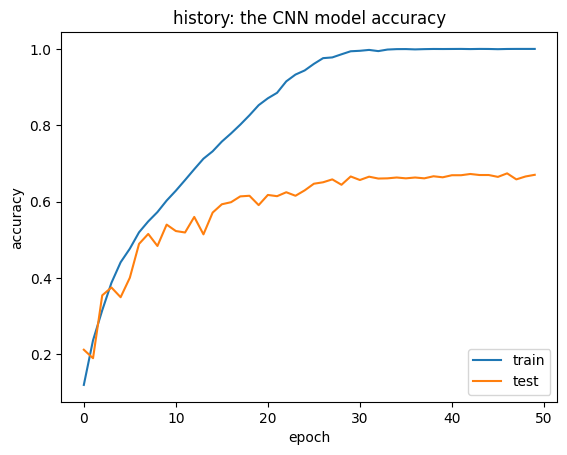

In [23]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('history: the CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

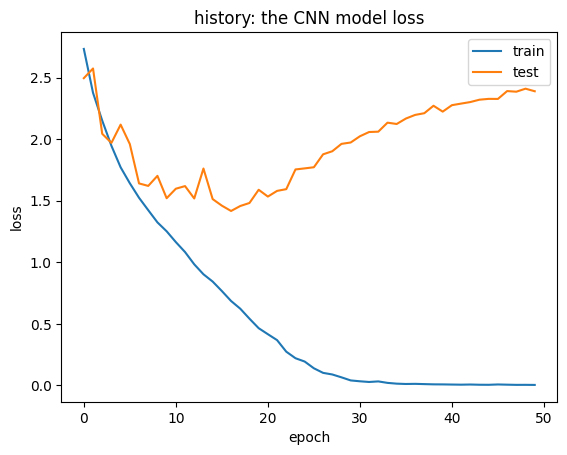

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('history: the CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


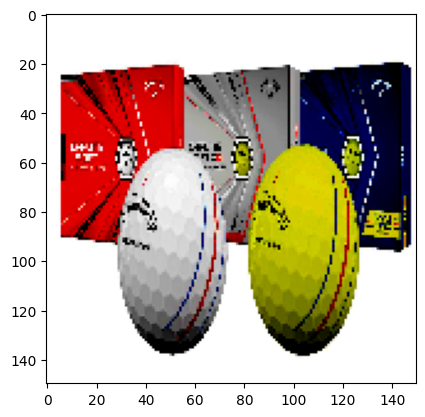

In [26]:
path2 = 'archive/test/golf_ball/golf_ball_1015.jpg'
img = load_img(path2, color_mode = "rgb", target_size=(150, 150))  #h, w
img = np.array(img, dtype = 'float32')
img = preprocess_input(img)
plt.imshow(img)
img = img.reshape(1,150,150,3)

In [27]:
y1 = model.predict(img)

1/1 [==============================] - 1s 832ms/step


In [28]:
print(label_decode[np.argmax(y1)])

golf_ball
